# Group 6, Project 2
### Sasha Morrison


## Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
# from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import calendar
from stats_can import StatsCan
plt.style.use('fivethirtyeight')

In [59]:
#https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029301

# unemployment data
ue = pd.read_csv('data/unemployment.csv')
ue = ue.loc[ue.GEO == 'Canada']
col = ['VALUE']
ue.index = ue['REF_DATE']
ue.index = ue.index.astype('datetime64[ns]')
ue = ue['2000':]
ue = ue[col]
ue['pct'] = ue['VALUE'].pct_change()
ue['pct'].iat[0] = 0

ue07 = ue['2007':]
# ue07.index = ue07.index.astype('datetime64[ns]')
ue2020 = ue['2020':]
ue2020 = ue2020.reset_index()
ue2019 = ue['2019':'2020']
ue2019 = ue2019.reset_index()
ueA = ue['2019':]
ueA = ueA.reset_index()
ueB = ue['2007':'2010']
ueB = ueB.reset_index()

In [3]:
sc = StatsCan()
# inflation data
inf = sc.table_to_df("18-10-0256-01")
col = ['VALUE']
inf = inf.loc[inf['Alternative measures'] == 'Consumer Price Index (CPI), all-items excluding eight of the most volatile components as defined by the Bank of Canada, seasonally adjusted']
inf.index = inf['REF_DATE']
# careful, removes ref date
inf = inf[col]
inf['pct'] = inf['VALUE'].pct_change(12)
inf['pct'].iat[0] = 0
inf = inf['2000':]


# global financial crisis inflation (Canada)
gfc_inf = inf['2007':'2010'] 
# gfc_inf = gfc_inf.reset_index(drop=False)
# covid inflation (Canada)
cvd_inf = inf['2019':'2020'] 
# cvd_inf = cvd_inf.reset_index(drop=False)
inf

,VALUE,pct
REF_DATE,,
2000-01-01,95.0,0.013874
2000-02-01,95.1,0.013859
2000-03-01,95.3,0.013830
2000-04-01,95.2,0.010616
2000-05-01,95.4,0.011665
...,...,...
2020-07-01,134.7,0.008234
2020-08-01,134.8,0.008227
2020-09-01,135.1,0.010471


In [62]:
# GDP data from FRED
tgdp = pd.read_csv('data/tot_gdp.csv')
tgdp['DATE'] = pd.to_datetime(tgdp['DATE'])
tgdp.columns = ['DATE', 'GDP']
tgdp['pct'] = tgdp['GDP'].pct_change(4)
tgdp.index = tgdp.DATE
tgdp = tgdp.drop('DATE', axis=1)

tgdp.tail()

,GDP,pct
DATE,,
2019-07-01,5.280298e+11,0.018966
2019-10-01,5.285282e+11,0.017116
2020-01-01,5.186320e+11,-0.002809
2020-04-01,4.599510e+11,-0.124992
2020-07-01,5.007710e+11,-0.051624


In [5]:
#https://health-infobase.canada.ca/covid-19/epidemiological-summary-covid-19-cases.html

# total covid cases Canada
covid = pd.read_csv('data/covid_data.csv')
covid = covid.loc[covid.prname == 'Canada']
covid = covid.reset_index(drop=True)
covid['date'] = pd.to_datetime(covid.date)
covid.index = covid['date']
# covid.drop('date')
covid['delta'] = covid.numconf.shift(periods=1)
covid['delta'] =  covid.numconf - covid.delta 
covid['delta'].iat[0] = 4 # hard code first val
covid['delta_death'] = covid['numdeaths'].diff()
covid['delta_death'].iat[0] = 0
col = [ 'numconf','numdeaths','delta', 'delta_death']
covid = covid[col]
covid.head()

,numconf,numdeaths,delta,delta_death
date,,,,
2020-01-31,4,0.0,4.0,0.0
2020-02-08,7,0.0,3.0,0.0
2020-02-16,8,0.0,1.0,0.0
2020-02-21,9,0.0,1.0,0.0
2020-02-24,10,0.0,1.0,0.0


## Group Topic: Unemployment 
### 2019/2020 
### 2008/2020
### USA/Canadian Comparison
### By Province
### By Industry
### By Demographic

# Canadian Covid Numbers

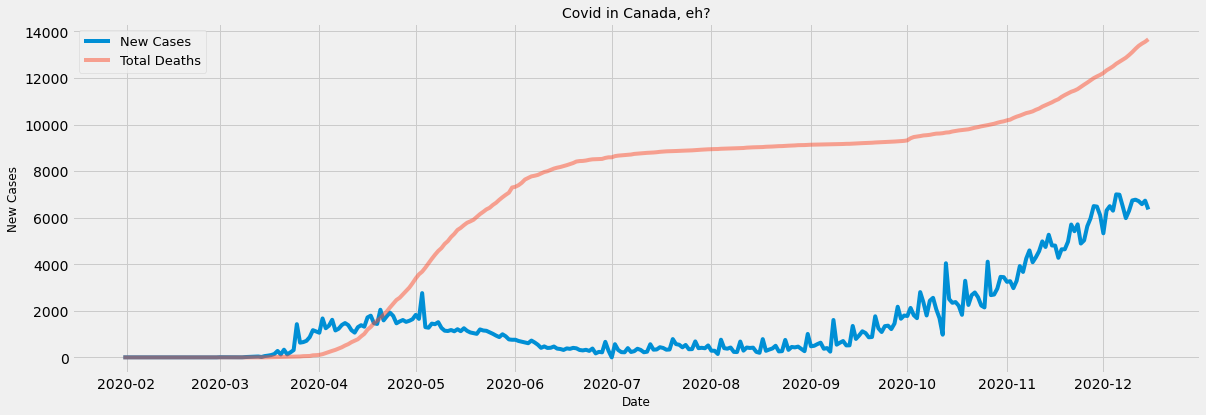

In [34]:
# daily covid change, Canada
fig, ax = plt.subplots(nrows=1, figsize = (18,6))
ax.plot(covid['delta'], label='New Cases')
ax.plot(covid['numdeaths'], label='Total Deaths', alpha=0.5)
plt.title('Covid in Canada, eh?', fontsize = 14)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('New Cases', fontsize = 12)
plt.xticks(rotation=0)
plt.legend(fontsize = 13, loc = 'upper left')
plt.show()

# Mark these:
# 11 Feb, 2020 Covid named
# 7 March, 100,000 cases global reported
# 11 March, Pandemic Dec
# 31 May, 222 covid deaths (highest daily)

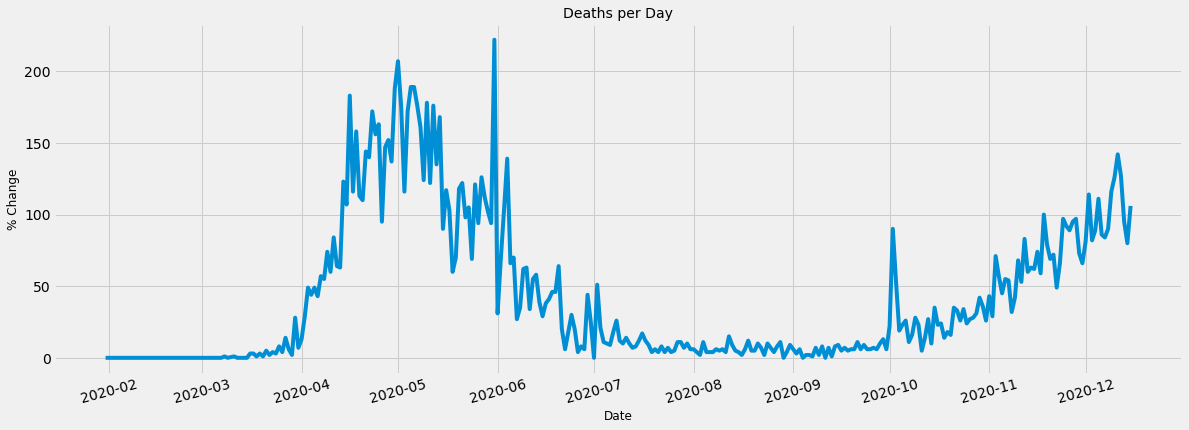

In [51]:
fig, ax = plt.subplots(nrows=1, figsize = (18,6))
ax.plot(covid['delta_death'])
plt.title('Deaths per Day', fontsize = 14)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('% Change', fontsize = 12)
plt.xticks(rotation=15)
plt.show()

# Unemployment

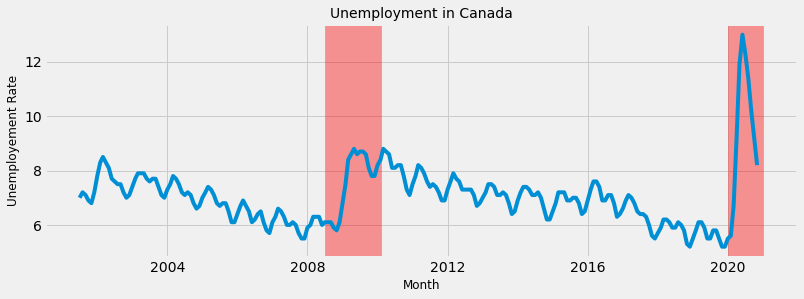

In [63]:
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (12,4))
ax.plot(ue.VALUE)
plt.title('Unemployment in Canada', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployement Rate', fontsize = 12)
ax.axvspan('2008-07', '2010-02', color='red', alpha=0.4)
ax.axvspan('2020', '2021', color='red', alpha=0.4)
# plt.xticks(range(12),mon, rotation=0)
plt.show()

## Comparing 2019 & 2020 Unemployment

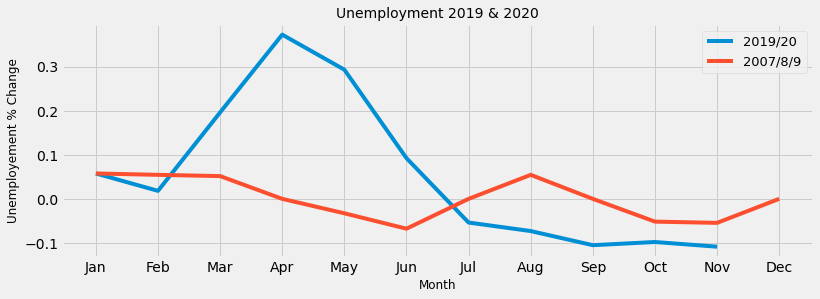

In [8]:
month = calendar.month_name[1:13]
months = []
n = 1
for i in range(n):
    months.extend(month)
mon = [ i[:3] for i in months ]

fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (12,4))
ax.plot(ue2020.pct, label = '2019/20')
ax.plot(ue2019.pct, label = '2007/8/9')
plt.title('Unemployment 2019 & 2020', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployement % Change', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.xticks(range(12),mon, rotation=0)
plt.show()

## Statistical Test  

Assuming a normal distribution:
If p < 0.05, the null hypothesis is rejected

In [9]:
stats.ttest_ind(ue2020.VALUE, ue2019.VALUE) 
# p << 0.05 so it is significant

Ttest_indResult(statistic=4.82597270109764, pvalue=9.04905188727354e-05)

# GDP & Inflation comparisons

>As a reasonable approach to deal with analyzing the economic impacts of COVID-19, it makes sense to compare this  
pandemic with previous and similar situations and take the lessons learned there and apply them here. As a comparable case  
with tons of learned lessons, the Great Recession that hit the financial markets during 2006 - 2009 can be studied and compared  
with the coronavirus pandemic. Then, the confrontation strategies and remediation the authorities employed during that period  
of time can be explored and adapted to minimize the impacts of COVID-19 on economy  

#### Source: "A Concern Analysis of FOMC Statements Comparing The Great Recession and The COVID-19 Pandemic"  
By: Luis Felipe Gutierrez, Sima Siami-Namini, Neda Tavakoli, Akbar Siami Namin1  

<img src="data/pic.png" style="width:600px;length:1200px">  

Source: https://hbr.org/2020/03/understanding-the-economic-shock-of-coronavirus

## By July 2010, Canada's GDP had recovered to 'pre GFC' levels.

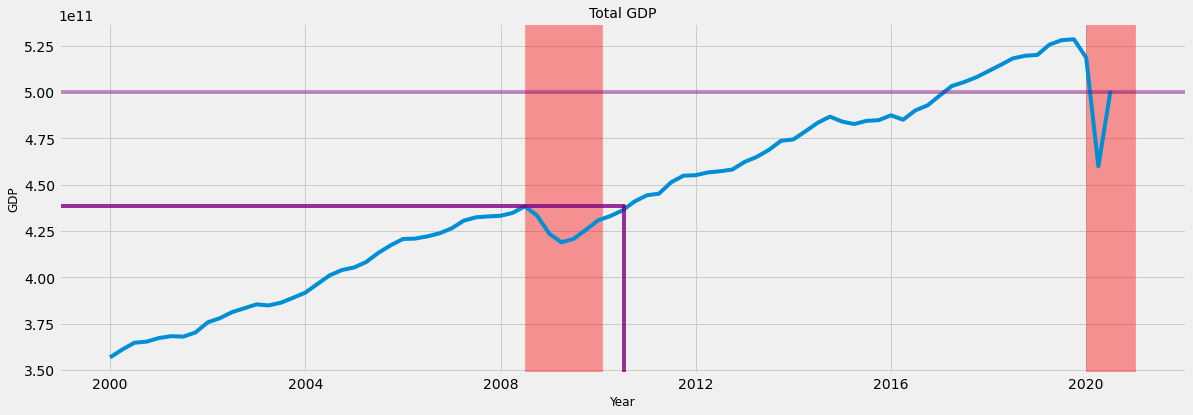

In [47]:
fig, ax = plt.subplots(nrows=1, sharey=False, figsize = (18,6))
ax.plot(tgdp['2000':]['GDP'], label = 'GDP')
plt.title('Total GDP', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('GDP', fontsize = 12)
ax.axvspan('2008-07', '2010-02', color='red', alpha=0.4)
ax.axvspan('2020', '2021', color='red', alpha=0.4)
ax.axhline(5e11, color='purple', alpha=0.4)
ax.axhline(4.385e11, xmax=0.502,color='purple', alpha=0.8)
ax.axvline('2010-07-10', ymax=0.48,color='purple', alpha=0.8)
plt.show()

#pct change gdp (quaterly)

## The % loss caused by the pandemic was upwards of three times the drop seen during the GFC.

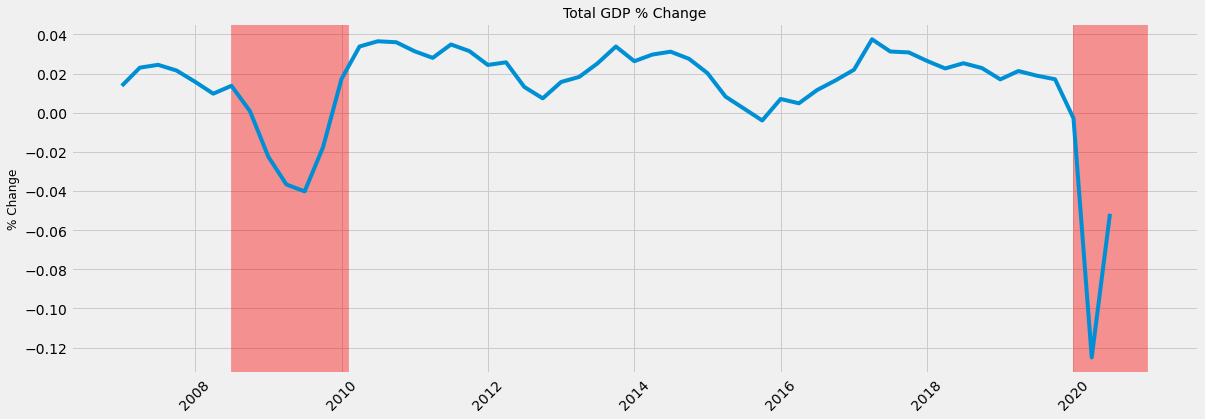

In [36]:
fig, ax = plt.subplots(nrows=1, sharey=False, figsize = (18,6))
ax.plot(tgdp['2007':]['pct'], label = 'GDP')
plt.title('Total GDP % Change', fontsize = 14)
plt.ylabel('% Change', fontsize = 12)
plt.xticks(rotation=45)
ax.axvspan('2008-07', '2010-02', color='red', alpha=0.4)
ax.axvspan('2020', '2021', color='red', alpha=0.4)
plt.show()

>The results of our study show that the consequences and economic impacts of COVID-19 are far deeper damaging than the  
Great Recession. During the period of COVID-19, the unemployment rate is rocket high (close to 15%) and the interest rate is  
as low as zero.  

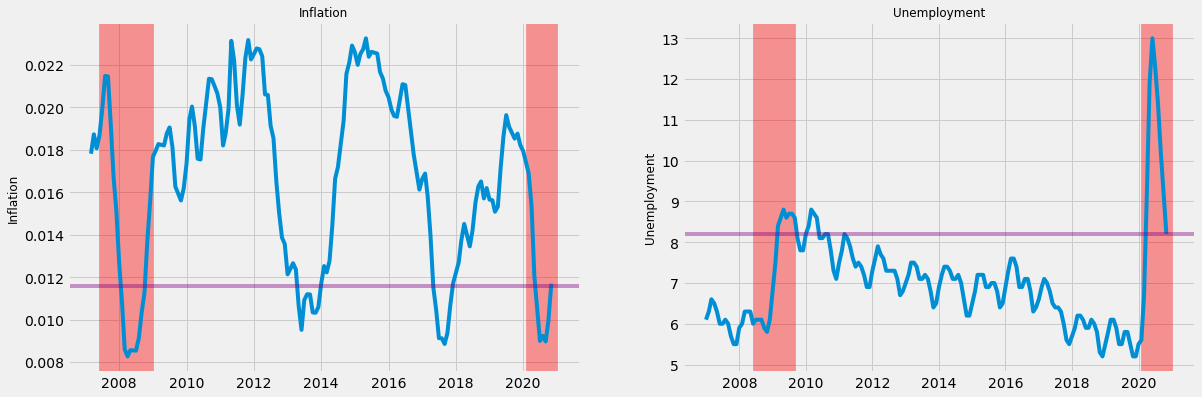

In [12]:
inf2 = inf['2007':].rolling(3).mean()
fig, ax = plt.subplots(nrows=1,ncols=2, figsize = (18,6))
ax[0].plot(inf2.pct)
ax[0].set_ylabel('Inflation', fontsize = 12)
ax[0].set_title('Inflation', fontsize = 12)
ax[0].axvspan('2007-06', '2009', color='red', alpha=0.4)
ax[0].axvspan('2020-02', '2021', color='red', alpha=0.4)
ax[0].axhline(0.0116, color='purple', alpha=0.4)
ax[1].plot(ue07.VALUE)
ax[1].set_title('Unemployment', fontsize = 12)
ax[1].set_ylabel('Unemployment', fontsize = 12)
ax[1].axvspan('2008-06', '2009-09', color='red', alpha=0.4)
ax[1].axvspan('2020-02', '2021', color='red', alpha=0.4)
ax[1].axhline(8.2, color='purple', alpha=0.4)
plt.show()

# Looking Forward

### Predictions, can we make them??

In [13]:
fitted_model = ExponentialSmoothing(ue['VALUE'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()
forecast = fitted_model.forecast(13)
forecast = forecast.reset_index(drop=True)
ind = range(22,35)
forecast.index = ind
# produces a series of 'seasonal_periods' data points
# needs to be implemented into the forecast charts below

C:\Users\Sasha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sasha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Sasha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


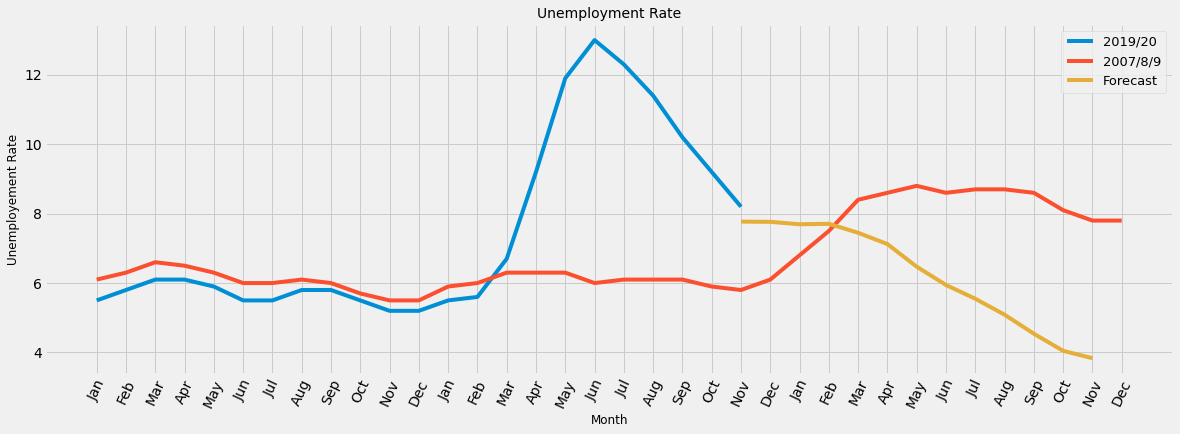

In [14]:
month = calendar.month_name[1:13]
months = []
n = 3
for i in range(n):
    months.extend(month)
mon = [ i[:3] for i in months ]


fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (18,6))
ax.plot(ueA.index, ueA.VALUE, label = '2019/20')
ax.plot(ueB.index, ueB.VALUE, label = '2007/8/9')
ax.plot(forecast.index, forecast, label = 'Forecast')
plt.title('Unemployment Rate', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployement Rate', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.xticks(range(36),mon, rotation=65)
plt.show()
#ueA VALUE has 23 vals, forecast should be 13
# could: match Dec 2007 to Feb 2020

### Mmm, perhaps not.